In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
%%query_hive --hiveserver prod-agatti-dp-m-2
SELECT
  *
FROM adhoc.heavy_searcher_stats_20190101
UNION ALL
SELECT
  *
FROM adhoc.heavy_searcher_stats_20190201
UNION ALL
SELECT
  *
FROM adhoc.heavy_searcher_stats_20190301
UNION ALL
SELECT
  *
FROM adhoc.heavy_searcher_stats_20190401

Query took: 22.394857 seconds


,register_id,dt,_c2
0,364005908,20190301,591
1,364005908,20190302,950
2,364005908,20190303,552
3,364005908,20190304,602
4,364005908,20190305,1036
5,364005908,20190306,944
6,364005908,20190307,796
7,364005908,20190308,872
8,364005908,20190309,1408
9,364005908,20190310,173


In [6]:
df = _

In [ ]:
'''%%query_hive --hiveserver prod-agatti-dp-m-2
    SELECT
      t1.register_id,
      t1.dt,
      COUNT(*) 
    FROM dwh.fact_serversearch t1
    WHERE t1.dt BETWEEN '20190401' AND '20190501'
      AND t1.register_id IN (
      SELECT
          tin2.register_id
      FROM adhoc.heavy_searchers tin1
      JOIN dwh.dim_trueuser tin2
      ON (tin1.phone_number = tin2.true_number AND tin2.dt='20190701')
      )
    GROUP BY 
      t1.register_id,
      t1.dt
  '''

In [7]:
df.columns

Index(['register_id', 'dt', '_c2'], dtype='object')

In [8]:
df.columns = ['register_id','dt','searches']
df.head()

,register_id,dt,searches
0,364005908,20190301,591
1,364005908,20190302,950
2,364005908,20190303,552
3,364005908,20190304,602
4,364005908,20190305,1036


In [2]:
%%query_hive --hiveserver prod-agatti-dp-m-2
SELECT
  t1.phone_number,
  t2.register_id
FROM adhoc.heavy_searchers t1
JOIN dwh.dim_trueuser t2
ON (t1.phone_number = t2.true_number AND t2.dt='20190701')

Query took: 633.731806 seconds


,phone_number,register_id
0,917395902332,861439261
1,917395902332,616073083
2,917395902332,599111368
3,917395902332,511362586
4,919463021980,403940571
5,919463021980,505482836
6,919463021980,152732069
7,919845251438,310365700
8,919845251438,80989831
9,919845251438,857388118


In [3]:
df2 = _

In [ ]:
%%query_hive --hiveserver prod-agatti-dp-m-2
SELECT
  t1.phone_number,
  t2.register_id
FROM adhoc.heavy_searchers t1
JOIN dwh.dim_trueuser t2
ON (t1.phone_number = t2.true_number AND t2.dt='20190701')

In [9]:
dfj = df.join(df2.set_index('register_id'),on='register_id',how='left')

In [10]:
dfj.head()

,register_id,dt,searches,phone_number
0,364005908,20190301,591,919910086664
1,364005908,20190302,950,919910086664
2,364005908,20190303,552,919910086664
3,364005908,20190304,602,919910086664
4,364005908,20190305,1036,919910086664


In [14]:
dfg = pd.DataFrame(dfj.groupby(['phone_number'])['searches'].sum())

In [20]:
df2.groupby(['phone_number'])

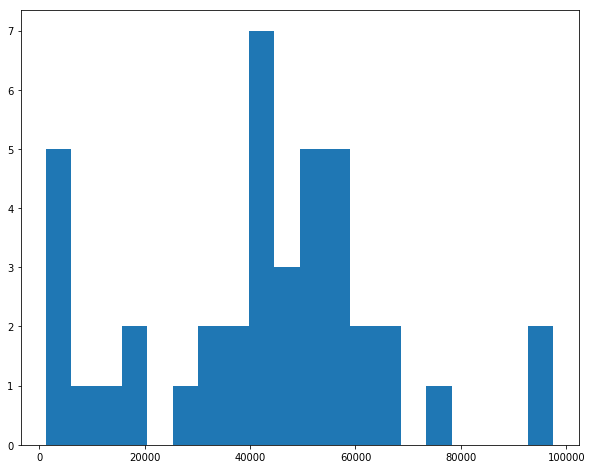

In [25]:
plt.figure(figsize=(10,8))
plt.hist(dfg['searches'],bins=20)
plt.show()

In [30]:
list(dfg[dfg['searches']<10000].index)

['919063183160',
 '919424952596',
 '919664697300',
 '919757195954',
 '919910108550',
 '919935225255']

In [45]:
low_nums = list(dfg[dfg['searches']<10000].index)
dfj.query("phone_number in low_nums")

UndefinedVariableError: name 'low_nums' is not defined

In [52]:
dfg['phone_number'] = dfg.index

In [53]:
low_nums = list(dfg[dfg['searches']<10000].index)
cut = dfg['phone_number'].isin(low_nums)
dfg[cut]


,searches,phone_number
phone_number,,
919063183160,7913,919063183160
919424952596,5296,919424952596
919664697300,4127,919664697300
919757195954,2855,919757195954
919910108550,1268,919910108550
919935225255,1553,919935225255


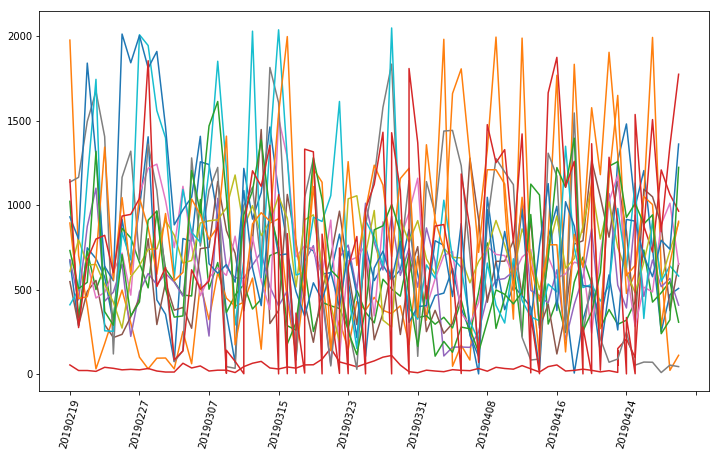

In [69]:
nums = pd.unique(dfg['phone_number'])
dfj.sort_values(by=['phone_number','dt'],inplace=True)
plt.figure(figsize=(12,7))
for num in nums[0::3]:
    cut = dfj['phone_number']==num
    plt.plot(dfj[cut]['dt'],dfj[cut]['searches'])
#plt.locator_params(axis = 'x', nbins = 14)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12))
plt.xticks(rotation=75)
plt.show()

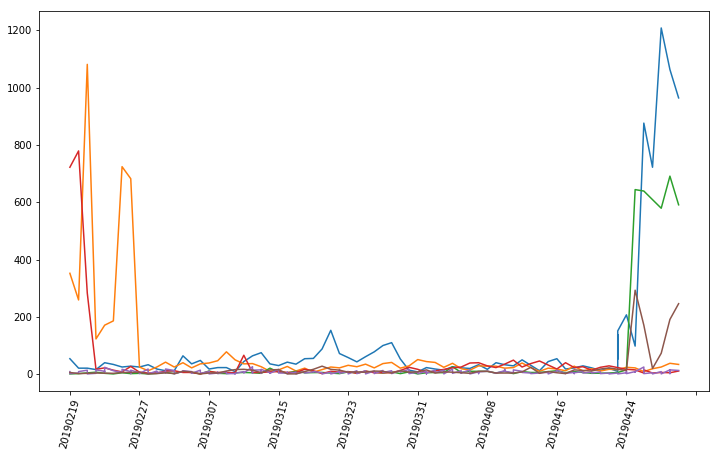

In [70]:
low_nums = list(dfg[dfg['searches']<10000].index)
plt.figure(figsize=(12,7))
for num in low_nums:
    cut = dfj['phone_number']==num
    plt.plot(dfj[cut]['dt'],dfj[cut]['searches'])
#plt.locator_params(axis = 'x', nbins = 14)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(12))
plt.xticks(rotation=75)
plt.show()

In [75]:
cut = (dfj['searches']>50)
dfc = dfj[cut].groupby('phone_number').count()
dfc.head()

,register_id,dt,searches
phone_number,,,
917395902332,68,68,68
917595834602,68,68,68
918130695143,68,68,68
918291359377,65,65,65
918375869929,36,36,36


In [79]:
cut = (dfc['searches']<30)
dfc[cut]['searches'].head(20)

phone_number
919063183160    26
919424952596    10
919664697300     6
919757195954     4
919935225255     5
Name: searches, dtype: int64